<a href="https://colab.research.google.com/github/ShantanuPuri/COVID-19-Death-Disparities/blob/main/COVID_19_Death_Disparities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Reading Between the Lines of COVID-19 

For my project, I opted to take the given John Hopkins COVID-19 dataset as stepping stone, to go on to find more data that was lurking beneath the surface. I chose this dataset because it served as a great starting point - by supplying me with the breakdown of COVID-19 confirmed cases and confirmed deaths by county. 

I then went on to find additional race data by county, which I was able to use to good effect in the "EDA" section. 

Finally, I discovered useful state-wise statistics for socioeconomic factors, namely poverty and unemployment. While I had stated in my proposal that I wished to find out the potential unequal impact that COVID-19 has had on different races, I was forced to improvise as I could not find race data by county, only by state. And, although I could have analyzed this by state, I thought it would be too incomprehensive of a study, and frankly a waste of the exhaustive county data I had access too.

Instead, I decided to study the potential unequal impact that COVID-19 might have had on the unemployed and those below the poverty line. I did this by trying out a variety of classifier models to see which would work best. The goal of opting for the classifier models was simple - to adjudge whether poverty and unemployment were good enough predictors of an increased susceptibility to COVID-19. 

In other words, I attempted to predict if certain counties could be considered 'high risk' counties based on their poverty and unemployment rates.

# Libraries and Setup Jargon!
Run the following  cells to setup the notebook. When prompted for a selection, select the number that is associated with java 8

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 10 newly installed, 0 to remove and 35 not upgraded.
Need to get 40.7 MB of archives.
After this opera

In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=f91b9fb2d37b062de2260eed0d1dd12ce1ee5423ed653de13bdf97504f1fc3cc
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


# Section 1: Data loading and Preprocessing
### (NOTE: You must run all of the code cells in the above 'Libraries and Setup Jargon!' section before proeceeding)

<p align = "center">
<img src = "https://miro.medium.com/max/1080/1*_oSOImPmBFeKj8vqE4FCkQ.jpeg" width= "650" align ="left"/>
</p>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


###1.1: Initializing Race Distribution by County DataFrame

The following code cell sets up a new DataFrame, 'race_df', to store all relevant data for distribution of race by county in the United States. There are 6 broad categories of race that are recognized by the United States Census Bureua - 'White', 'Black', 'American Indian/Alaskan Native', 'Asian', 'Native Hawaiian/Other Pacific Islander', as well as those that get classified as 'Two or More Races'.

The code cell also executes some basic renaming of columns for convenience purposes. 

**Name of file used:** complete_race_data.csv

**Data source**: United States Census Bureau - Annual Estimates of the Resident Population by Sex, Race, and Hispanic Origin: April 1, 2010 to July 1, 2018 for "ALABAMA" **(select 'Alabama' in the 2nd heading under tables) OR (click on the second link I have provided below to directly initiate file download)**

*NOTE: Although it says 'Alabama', it contains data for all states* 

**Link to source:** 
The CSV file can be obtained after unzipping the downloaded zipped file (using either of the two following options). It is called **'PEP_2018_PEPSR6H_with_ann.csv'**

*   Option 1 -> Use the following link to navigate to Alabama in the second heading under 'Tables' as instructed above: https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-detail.html
*   Option 2 -> Directly initiate download of zip: https://www2.census.gov/programs-surveys/popest/tables/2010-2018/counties/asrh/PEP_2018_PEPSR6H.zip






In [ ]:
import pandasql as ps #SQL on Pandas Dataframe

# initializes race_df DataFrame
race_copied_path = "drive/My Drive/Bruises/complete_race_data.csv"
race_df = pd.read_csv(race_copied_path, encoding='latin-1', header=1)

# replacing spaces with underscores in column names that contain spaces 
race_df.columns = [column.replace(' ', '_') for column in race_df.columns

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,Referee,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR,HBP,ABP,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,20043,Rob Harris,17,8,14,4,2,1,6,6,13,12,8,6,1,2,0,0,10,20,2.00,3.00,3.20,2.20,2.9,2.70,2.20,3.25,2.75,2.20,3.25,2.88,2.10,3.2,3.10
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,34914,Graham Barber,17,12,10,5,1,0,7,7,19,14,2,3,1,2,0,0,10,20,1.47,3.40,5.20,1.60,3.2,4.20,1.50,3.40,6.00,1.50,3.60,6.00,1.44,3.6,6.50
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,20624,Barry Knight,6,16,3,9,0,1,8,4,15,21,1,3,5,3,1,0,75,30,2.15,3.00,3.00,2.20,2.9,2.70,2.25,3.20,2.75,2.30,3.20,2.75,2.30,3.2,2.62
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,27223,Andy D'Urso,6,13,4,6,0,0,5,8,11,13,0,2,1,1,0,0,10,10,2.00,3.10,3.20,1.80,3.0,3.50,2.20,3.25,2.75,2.05,3.20,3.20,2.00,3.2,3.20
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,40010,Dermot Gallagher,17,12,8,6,0,0,6,4,21,20,6,1,1,3,0,0,10,30,1.65,3.30,4.30,1.55,3.3,4.50,1.55,3.50,5.00,1.57,3.60,5.00,1.61,3.5,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,19/05/01,Man City,Chelsea,1,2,A,1,1,D,34479,Mike Riley,3,9,1,3,0,0,8,7,22,18,2,2,4,2,0,0,40,20,3.60,3.25,1.82,3.80,3.2,1.65,4.00,3.60,1.67,4.20,3.40,1.70,4.00,3.1,1.80
376,E0,19/05/01,Middlesbrough,West Ham,2,1,H,2,1,H,33057,Paul Durkin,19,11,7,5,0,0,5,6,13,15,5,2,0,0,0,0,0,0,1.90,3.25,3.50,1.90,2.9,3.20,1.80,3.25,3.75,1.90,3.20,3.50,1.83,3.4,3.50
377,E0,19/05/01,Newcastle,Aston Villa,3,0,H,2,0,H,51306,Barry Knight,9,5,5,1,0,0,5,1,10,14,2,4,0,5,1,1,25,75,2.20,3.20,2.82,2.10,2.9,2.90,2.40,3.25,2.50,2.38,3.30,2.50,2.25,3.4,2.60
378,E0,19/05/01,Southampton,Arsenal,3,2,H,0,1,A,15252,Paul Taylor,11,8,7,5,0,1,7,5,17,10,3,2,1,2,0,0,10,20,2.82,3.15,2.20,2.35,3.0,2.35,2.50,3.25,2.37,2.63,3.25,2.30,2.62,3.5,2.20


##1.2: Manipulating Race DataFrame

*   The initial race_df DataFrame contains data for all years ranging from 2010-2018, and we wish to keep only data for the year 2018.
*   We also wish to filter it so that we encapsulate only rows that represent data for both sexes.
*   We further wish to filter rows, so that we include both, Hispanic and Non-Hispanic people.
*   Lastly, we also wish to combine 'American Indian/Alaskan Native' and 'Native Hawaiian/Other Pacific Islander' attributes into just a single attribute 'Native_American'.

The code cell also executes some basic renaming of columns for convenience purposes, following which we trim the DataFrame so that only relevant columns are kept.

In [ ]:
import sqlite3
conn = sqlite3.connect('local.db')

race_df.to_sql('race', conn, if_exists = "replace") #convert to SQL

# setting up new df, 'race_2018_df', after having filtered for 2018 rows, as well as for rows representing both sexes
race_2018_df = pd.read_sql(''' SELECT * FROM race WHERE "Year" == "July 1, 2018" 
                               AND "Sex" == "Both Sexes" ''', conn) 

race_2018_df.to_sql('race_2018', conn, if_exists = "replace") #convert to SQL

# filtering for rows that represent both 'Hispanic' and 'Non-Hispanic' people, not one or the other
race_2018_df = pd.read_sql(''' SELECT * FROM race_2018 WHERE "Hispanic_Origin" != "Hispanic"     
                               AND "Hispanic_Origin" != "Not Hispanic" ''', conn)

# renaming columns 
race_2018_df = race_2018_df.rename(columns={"Race_Alone_-_White": "White",  
                                            "Race_Alone_-_Black_or_African_American": "Black", 
                                            "Race_Alone_-_American_Indian_and_Alaska_Native": "Native_American1", 
                                            "Race_Alone_-_Asian": "Asian", 
                                            "Race_Alone_-_Native_Hawaiian_and_Other_Pacific_Islander": "Native_American2",
                                            "Two_or_More_Races": "Unclassified"})

# Combining columns to form a single Native American column
race_2018_df['Native_American'] = race_2018_df['Native_American1'] + race_2018_df['Native_American2']

# setting up the final df for our race data, 'race_final_df', and trimming data; keeping only the relevant attributes 
race_final_df = race_2018_df.filter(items=['Geography', 'Total', 'White', 'Black', 'Asian', 'Native_American', 'Unclassified'])
race_final_df

,Geography,Total,White,Black,Asian,Native_American,Unclassified
0,"Autauga County, Alabama",55601,42660,10915,681,329,1016
1,"Baldwin County, Alabama",218022,190301,19492,2508,1830,3891
2,"Barbour County, Alabama",24881,12209,12042,113,210,307
3,"Bibb County, Alabama",22400,17211,4770,53,124,242
4,"Blount County, Alabama",57840,55456,950,185,448,801
...,...,...,...,...,...,...,...
3137,"Sweetwater County, Wyoming",43051,40397,592,435,733,894
3138,"Teton County, Wyoming",23081,21971,175,326,246,363
3139,"Uinta County, Wyoming",20299,19356,168,96,318,361
3140,"Washakie County, Wyoming",7885,7450,40,65,151,179


##1.3: Creating separate attributes for County and State

Now we wish to break up the 'Geography' attribute into two separate attributes - one for 'County' and one for 'State'

*   The county can be extracted by obtaining the String preceding the comma in the 'Geography' attribute. We create a function called 'splitByCommaCounty' to execute this.
*   In order to be able to successfully merge with our Covid dataset, we need to remove the last word in the 'County' attribute. More often than not the last word is simply the word 'county', which does not match the format we require. Other times, words like 'city' or 'area' make up the last word, and this, too, does not match the format of the Covid dataset. We create a function called 'removeLastWord' to execute this.
*   The state can be extracted similarly to county. We create a function called 'splitByCommaState' to execute this.
*   We need to get rid of the extra whitespace at the start of the 'State' attribute we have created. We create a function called 'removeLeadingWhitespace' to execute this.

The code cell executes each of these functions in aforementioned order.

In [ ]:
# function to return the String that precedes the first comma
def splitByCommaCounty(x):
  county = x.split(',')[0]
  return county

# function to remove the last word in a String
def removeLastWord(x):
  county = x
  count_whitespaces = 0
  # loop to count number of whitespaces 
  for i in county: 
    if i == ' ': 
      count_whitespaces = count_whitespaces + 1

  county_new = ""
  # loop to remove the word succeeding the last whitespace (i.e. remove the last word) 
  for i in range (0, count_whitespaces):
    county_new += county.split(' ')[i]
    if i != count_whitespaces-1:
      county_new += " "
  return county_new

# function to return the String that succeeds the first comma
def splitByCommaState(x):
  state = x.split(',')[1]
  return state

# function to get rid of leading whitespace
def removeLeadingWhitespace(x):
  x = x.lstrip()
  return x

# creates the 'County' attribute by extracting the String preceding the first comma in the existing 'Geography' attribute
race_final_df['County'] = race_final_df['Geography'].apply(splitByCommaCounty)

# updates the existing 'County' attribute by removing the String succeeding the last whitespace
race_final_df['County'] = race_final_df['County'].apply(removeLastWord)

# creates the 'State' attribute by extracting the String succeeding the first comma in the existing 'Geography' attribute
race_final_df['State'] = race_final_df['Geography'].apply(splitByCommaState)

# updates the existing 'State' attribute by keeping only the part that succeeds the first whitespace 
race_final_df['State'] = race_final_df['State'].apply(removeLeadingWhitespace)

race_final_df

,Geography,Total,White,Black,Asian,Native_American,Unclassified,County,State
0,"Autauga County, Alabama",55601,42660,10915,681,329,1016,Autauga,Alabama
1,"Baldwin County, Alabama",218022,190301,19492,2508,1830,3891,Baldwin,Alabama
2,"Barbour County, Alabama",24881,12209,12042,113,210,307,Barbour,Alabama
3,"Bibb County, Alabama",22400,17211,4770,53,124,242,Bibb,Alabama
4,"Blount County, Alabama",57840,55456,950,185,448,801,Blount,Alabama
...,...,...,...,...,...,...,...,...,...
3137,"Sweetwater County, Wyoming",43051,40397,592,435,733,894,Sweetwater,Wyoming
3138,"Teton County, Wyoming",23081,21971,175,326,246,363,Teton,Wyoming
3139,"Uinta County, Wyoming",20299,19356,168,96,318,361,Uinta,Wyoming
3140,"Washakie County, Wyoming",7885,7450,40,65,151,179,Washakie,Wyoming


##1.4: Initializing Covid Confirmed Cases Distribution by County DataFrame

The following code cell sets up a new DataFrame, 'covid_df', to store all relevant data for distribution of confirmed covid cases by county in the United States. 

This dataset contains the confirmed COVID-19 cases by county for a total of 104 days: ranging from 1/22/20 - 5/4/20.

The code cell also executes some basic dropping of NaN rows and renaming of columns, as needed. 

**Name of file used:** covid19_confirmed_US.csv

**Data source**: John Hopkins University - COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University

**Link to source:** https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

In [ ]:
# initializes covid_df DataFrame
covid_copied_path = "drive/My Drive/Bruises/covid19_confirmed_US.csv"
covid_df = pd.read_csv(covid_copied_path)

#dropna
covid_df = covid_df.dropna()

# renaming columns
covid_df = covid_df.rename(columns={"Admin2": "County_covid", "Province_State": "State_covid"})
covid_df

,UID,iso2,iso3,code3,FIPS,County_covid,State_covid,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
5,84001001.0,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53
6,84001003.0,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181,187,188
7,84001005.0,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18,20,22,28,29,30,32,32,33,35,37,37,39,42,43,45,45
8,84001007.0,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,16,17,17,18,22,24,26,28,32,32,34,33,34,34,38,42,42,42,42,42,42,43,42
9,84001009.0,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,5,5,5,5,5,6,9,10,10,10,10,10,11,12,12,13,14,16,17,18,20,20,21,22,26,29,31,31,31,34,34,34,36,37,39,40,40,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,84090051.0,US,USA,840,90051.0,Unassigned,Virginia,US,0.000000,0.000000,"Unassigned, Virginia, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3248,84090053.0,US,USA,840,90053.0,Unassigned,Washington,US,0.000000,0.000000,"Unassigned, Washington, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,69,67,0,125,274,274,303,344,501,483,533,648,677,915,838,908,848,732,619,484,383,272,334,444,159,159,159,159,134,100,137,123,103,79,76,60,77,100,63,52
3249,84090054.0,US,USA,840,90054.0,Unassigned,West Virginia,US,0.000000,0.000000,"Unassigned, West Virginia, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3250,84090055.0,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.000000,0.000000,"Unassigned, Wisconsin, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##1.5: Manipulating Covid Confirmed Cases DataFrame

*   The state columns look fine, so we only need to get rid of any rows representing counties that don't match our format. 

Following the solitary manipulation step, we trim the DataFrame so that only relevant columns are kept.

Finally, since the confirmed cases data is cumulative, we rename the attribute representing the last date to 'total_confirmed' attribute.

In [ ]:
covid_df.to_sql('covid', conn, if_exists = "replace") #convert to SQL

# setting up new df, 'covid_final_df', after having dropped rows containing 'Unassigned' or 'Out of x' counties
covid_final_df = pd.read_sql(''' SELECT * FROM covid WHERE "County_covid" != "Unassigned" 
                                 AND "County_covid" NOT LIKE "%Out of%" ''', conn) 

# drops all unessential columns
covid_final_df = covid_final_df.drop(columns=['index', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])


# renames last date attribute to'total_confirmed' 
covid_final_df = covid_final_df.rename(columns={"5/4/20": "total_confirmed"})
covid_final_df

,County_covid,State_covid,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,total_confirmed
0,Autauga,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53
1,Baldwin,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181,187,188
2,Barbour,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18,20,22,28,29,30,32,32,33,35,37,37,39,42,43,45,45
3,Bibb,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,16,17,17,18,22,24,26,28,32,32,34,33,34,34,38,42,42,42,42,42,42,43,42
4,Blount,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,5,5,5,5,5,6,9,10,10,10,10,10,11,12,12,13,14,16,17,18,20,20,21,22,26,29,31,31,31,34,34,34,36,37,39,40,40,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,3,3,4,5,5,5,6,6,6,7,7,9,9,10,10,10,10,10,10,16,16,16,16,16,16,16,16,17,18,18,18,18,18
3138,Teton,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,10,13,14,16,20,26,29,32,36,39,40,41,44,45,50,53,56,56,57,58,59,61,62,62,62,92,93,93,95,95,95,95,96,96,96,96,97,98,98
3139,Uinta,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2,2,3,3,3,3,4,4,4,4,4,4,4,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8,8,8,8
3140,Washakie,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,2,2,4,4,4,5,5,5,5,5,5,5,5,6,5,5,5,5,8,8,8,8,8,8,8,8,8,8,8,8,8,8


##1.6: Initializing Covid Deaths Distribution by County DataFrame

The following code cell sets up a new DataFrame, 'covid_deaths_df', to store all relevant data for distribution of covid deaths by county in the United States. 

Like the confirmed cases dataset, this dataset also contains data for 104 days: ranging from 1/22/20 - 5/4/20.

The code cell also executes some basic dropping of NaN rows and renaming of columns, as needed. 

**Name of file used:** covid19_deaths_US.csv

**Data source**: John Hopkins University - COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University

**Link to source:** https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv

In [ ]:
# initializes covid_deaths_df DataFrame
covid_deaths_copied_path = "drive/My Drive/Bruises/covid19_deaths_US.csv"
covid_deaths_df = pd.read_csv(covid_deaths_copied_path)

# dropna
covid_deaths_df = covid_deaths_df.dropna()

# adding '_deaths' to column names to avoid confusion with covid confirmed cases DataFrame 
covid_deaths_df.columns = [column + '_deaths' for column in covid_deaths_df.columns]

# renaming columns
covid_deaths_df = covid_deaths_df.rename(columns={"Admin2_deaths": "County_covid", "Province_State_deaths": "State_covid", 
                                                  "Population_deaths": "Population"})
covid_deaths_df

,UID_deaths,iso2_deaths,iso3_deaths,code3_deaths,FIPS_deaths,County_covid,State_covid,Country_Region_deaths,Lat_deaths,Long__deaths,Combined_Key_deaths,Population,1/22/20_deaths,1/23/20_deaths,1/24/20_deaths,1/25/20_deaths,1/26/20_deaths,1/27/20_deaths,1/28/20_deaths,1/29/20_deaths,1/30/20_deaths,1/31/20_deaths,2/1/20_deaths,2/2/20_deaths,2/3/20_deaths,2/4/20_deaths,2/5/20_deaths,2/6/20_deaths,2/7/20_deaths,2/8/20_deaths,2/9/20_deaths,2/10/20_deaths,2/11/20_deaths,2/12/20_deaths,2/13/20_deaths,2/14/20_deaths,2/15/20_deaths,2/16/20_deaths,2/17/20_deaths,2/18/20_deaths,...,3/26/20_deaths,3/27/20_deaths,3/28/20_deaths,3/29/20_deaths,3/30/20_deaths,3/31/20_deaths,4/1/20_deaths,4/2/20_deaths,4/3/20_deaths,4/4/20_deaths,4/5/20_deaths,4/6/20_deaths,4/7/20_deaths,4/8/20_deaths,4/9/20_deaths,4/10/20_deaths,4/11/20_deaths,4/12/20_deaths,4/13/20_deaths,4/14/20_deaths,4/15/20_deaths,4/16/20_deaths,4/17/20_deaths,4/18/20_deaths,4/19/20_deaths,4/20/20_deaths,4/21/20_deaths,4/22/20_deaths,4/23/20_deaths,4/24/20_deaths,4/25/20_deaths,4/26/20_deaths,4/27/20_deaths,4/28/20_deaths,4/29/20_deaths,4/30/20_deaths,5/1/20_deaths,5/2/20_deaths,5/3/20_deaths,5/4/20_deaths
5,84001001.0,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,2,2,2,2,2,3,4,4,4,3,3,3,3
6,84001003.0,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4
7,84001005.0,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
8,84001007.0,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,84001009.0,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,84090051.0,US,USA,840,90051.0,Unassigned,Virginia,US,0.000000,0.000000,"Unassigned, Virginia, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,12,19,26,31,36,36,50,50,42,78,83,91,62,70,75,101,77,67,94,113,116,140,0,0,0,0,0,0,0,0,0,0,0,0,0
3248,84090053.0,US,USA,840,90053.0,Unassigned,Washington,US,0.000000,0.000000,"Unassigned, Washington, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3249,84090054.0,US,USA,840,90054.0,Unassigned,West Virginia,US,0.000000,0.000000,"Unassigned, West Virginia, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,2,2,3,4,6,9,9,11,17,19,20,0,0,0,0,0,0,0,0,0,0,0,0
3250,84090055.0,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.000000,0.000000,"Unassigned, Wisconsin, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##1.7: Manipulating Covid Deaths DataFrame

*   Again, state columns look fine, so we only need to get rid of any rows representing counties that don't match our format. 

We can then trim the DataFrame so that only relevant columns are kept.

Finally, since the confirmed deaths data is cumulative, we rename the attribute representing the last date to 'total_deaths' attribute.

In [ ]:
covid_deaths_df.to_sql('covid_deaths', conn, if_exists = "replace") #convert to SQL

# setting up new df, 'covid_deaths_final_df', after having dropped rows containing 'Unassigned' or 'Out of x' counties
covid_deaths_final_df = pd.read_sql(''' SELECT * FROM covid_deaths WHERE "County_covid" != "Unassigned" 
                                 AND "County_covid" NOT LIKE "%Out of%" ''', conn) 

# drops all unessential columns
covid_deaths_final_df = covid_deaths_final_df.drop(columns=['index', 'UID_deaths', 'iso2_deaths', 'iso3_deaths', 
                                                            'code3_deaths', 'FIPS_deaths', 'Country_Region_deaths', 
                                                            'Lat_deaths', 'Long__deaths', 'Combined_Key_deaths'])

# renames last date attribute to'total_deaths' 
covid_deaths_final_df = covid_deaths_final_df.rename(columns={"5/4/20_deaths": "total_deaths"})
covid_deaths_final_df

,County_covid,State_covid,Population,1/22/20_deaths,1/23/20_deaths,1/24/20_deaths,1/25/20_deaths,1/26/20_deaths,1/27/20_deaths,1/28/20_deaths,1/29/20_deaths,1/30/20_deaths,1/31/20_deaths,2/1/20_deaths,2/2/20_deaths,2/3/20_deaths,2/4/20_deaths,2/5/20_deaths,2/6/20_deaths,2/7/20_deaths,2/8/20_deaths,2/9/20_deaths,2/10/20_deaths,2/11/20_deaths,2/12/20_deaths,2/13/20_deaths,2/14/20_deaths,2/15/20_deaths,2/16/20_deaths,2/17/20_deaths,2/18/20_deaths,2/19/20_deaths,2/20/20_deaths,2/21/20_deaths,2/22/20_deaths,2/23/20_deaths,2/24/20_deaths,2/25/20_deaths,2/26/20_deaths,2/27/20_deaths,...,3/26/20_deaths,3/27/20_deaths,3/28/20_deaths,3/29/20_deaths,3/30/20_deaths,3/31/20_deaths,4/1/20_deaths,4/2/20_deaths,4/3/20_deaths,4/4/20_deaths,4/5/20_deaths,4/6/20_deaths,4/7/20_deaths,4/8/20_deaths,4/9/20_deaths,4/10/20_deaths,4/11/20_deaths,4/12/20_deaths,4/13/20_deaths,4/14/20_deaths,4/15/20_deaths,4/16/20_deaths,4/17/20_deaths,4/18/20_deaths,4/19/20_deaths,4/20/20_deaths,4/21/20_deaths,4/22/20_deaths,4/23/20_deaths,4/24/20_deaths,4/25/20_deaths,4/26/20_deaths,4/27/20_deaths,4/28/20_deaths,4/29/20_deaths,4/30/20_deaths,5/1/20_deaths,5/2/20_deaths,5/3/20_deaths,total_deaths
0,Autauga,Alabama,55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,2,2,2,2,2,3,4,4,4,3,3,3,3
1,Baldwin,Alabama,223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4
2,Barbour,Alabama,24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
3,Bibb,Alabama,22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Blount,Alabama,57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater,Wyoming,42343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3138,Teton,Wyoming,23464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3139,Uinta,Wyoming,20226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3140,Washakie,Wyoming,7805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##1.8: Initializing Population DataFrame**

The following code cell sets up a new DataFrame, 'population_df', to store all relevant data for distribution of population by county in the United States. 

The code cell also executes some basic dropping and renaming of columns, as needed. 

**Name of file used:** PopulationEstimates.xls

**Data source**: United States Department of Agriculture - Economic Research Service


**Link to source:** https://www.ers.usda.gov/webdocs/DataFiles/48747/PopulationEstimates.xls?v=3011.3

In [ ]:
# initializes population_df DataFrame
population_copied_path = "drive/My Drive/Bruises/PopulationEstimates.xls"
population_df = pd.read_excel(population_copied_path,header=2)

# keeping only relevant attributes
population_df = population_df.filter(items=['State', 'Area_Name', 'POP_ESTIMATE_2018'])

# renaming columns
population_df = population_df.rename(columns={"Area_Name": "County", "POP_ESTIMATE_2018": "Population"})
population_df

,State,County,Population
0,US,United States,327167434
1,AL,Alabama,4887871
2,AL,Autauga County,55601
3,AL,Baldwin County,218022
4,AL,Barbour County,24881
...,...,...,...
3268,PR,"Vega Baja Municipio, Puerto Rico",50185
3269,PR,"Vieques Municipio, Puerto Rico",8364
3270,PR,"Villalba Municipio, Puerto Rico",21476
3271,PR,"Yabucoa Municipio, Puerto Rico",32158


##1.9: Initializing Poverty DataFrame

The following code cell sets up a new DataFrame, 'poverty_df', to store all relevant data for poverty numbers by county in the United States. 

The code cell also executes some basic dropping and renaming of columns, as needed. 

**Name of file used:** PovertyEstimates.xls

**Data source**: United States Department of Agriculture - Economic Research Service


**Link to source:** https://www.ers.usda.gov/webdocs/DataFiles/48747/PovertyEstimates.xls?v=5454.3

In [ ]:
# initializes poverty_df DataFrame
poverty_copied_path = "drive/My Drive/Bruises/PovertyEstimates.xls"
poverty_df = pd.read_excel(poverty_copied_path,header=4)

# keeping only relevant attributes
poverty_df = poverty_df.filter(items=['Stabr', 'Area_name', 'PCTPOVALL_2018'])

# renaming columns
poverty_df = poverty_df.rename(columns={"Stabr": "State", "Area_name": "County", "PCTPOVALL_2018": "Poverty_rate"})
poverty_df

,State,County,Poverty_rate
0,US,United States,13.1
1,AL,Alabama,16.8
2,AL,Autauga County,13.8
3,AL,Baldwin County,9.8
4,AL,Barbour County,30.9
...,...,...,...
3188,WY,Sweetwater County,8.4
3189,WY,Teton County,6.3
3190,WY,Uinta County,10.0
3191,WY,Washakie County,11.9


##1.10: Initializing Unemployment DataFrame

The following code cell sets up a new DataFrame, 'unemployment_df', to store all relevant data for unemployment numbers by county in the United States. 

The code cell also executes some basic dropping and renaming of columns, as needed. It also manipulates columns where necessary.

**Name of file used:** UnemploymentEstimates.xls

**Data source**: United States Department of Agriculture - Economic Research Service


**Link to source:** https://www.ers.usda.gov/webdocs/DataFiles/48747/Unemployment.xls?v=2564.4

In [ ]:
# function to return the String that succeeds the first comma
def splitByCommaArea(x):
  county = x.split(',')[0]
  return county

# initializes unemployment_df DataFrame
unemployment_copied_path = "drive/My Drive/Bruises/UnemploymentEstimates.xls"
unemployment_df = pd.read_excel(unemployment_copied_path,header=4)

# keeping only relevant attributes
unemployment_df = unemployment_df.filter(items=['State', 'Area_name', 'Unemployment_rate_2018'])

# renaming columns
unemployment_df = unemployment_df.rename(columns={"Area_name": "County", "Unemployment_rate_2018": "Unemployment_rate"})

# updates the 'County' attribute by extracting the String preceding the first comma in the existing 'County' attribute
unemployment_df['County'] = unemployment_df['County'].apply(splitByCommaArea)
unemployment_df

,State,County,Unemployment_rate
0,US,United States,3.9
1,AL,Alabama,3.9
2,AL,Autauga County,3.6
3,AL,Baldwin County,3.6
4,AL,Barbour County,5.2
...,...,...,...
3270,PR,Vega Baja Municipio,10.4
3271,PR,Vieques Municipio,16.5
3272,PR,Villalba Municipio,15.9
3273,PR,Yabucoa Municipio,14.3


##1.11: Master DataFrame: Combining Population, Poverty, and Unemployment

The master df combines population, poverty, and unemployment data.

*   Initially merges population_df and poverty_df on both County and State attributes.
*   Then, merges newly created master_df and unemployment_df on both County and State attributes.
*   Creates a 'refactorState' function to change the format of the state names (to match format of John Hopkins data).
*   This is followed by another function to correctly format County attribute.

Therafter, we can successfully merge with our original covid_deaths_final_df. We also add an additional column for percentage of number of deaths per capita. 

Finally, and most importantly, we create a boolean attribute 'High Risk':
*   Any county that has a value of % of number of deaths per capita that is greater than the mean value is assigned 'True', indicating that that county is indeed at high risk.
*   Every other county is assigned 'False', indicating that that county is not at high risk.

In [ ]:
# initialzing 'master_df' to be the resulting df of merging 'population_df' with 'poverty_df'
master_df = population_df.merge(poverty_df, how='inner', left_on=["County", "State"], right_on=["County","State"])

# further merging 'master_df' with 'unemployment_df'
master_df = master_df.merge(unemployment_df, how='inner', left_on=["County", "State"], right_on=["County","State"])

# function to refactor state column
def refactorState(x):
  if x == "AL": 
    return "Alabama"
  elif x == "AK":
    return "Alaska"
  elif x == "AZ":
    return "Arizona"
  elif x == "AR":
    return "Arkansas"
  elif x == "CA":
    return "California"
  elif x == "CO":
    return "Colorado"
  elif x == "CT":
    return "Connecticut"
  elif x == "DE":
    return "Delaware"
  elif x == "FL":
    return "Florida"
  elif x == "GA":
    return "Georgia"
  elif x == "HI":
    return "Hawaii"
  elif x == "ID":
    return "Idaho"
  elif x == "IL":
    return "Illinois"
  elif x == "IN":
    return "Indiana"
  elif x == "IA":
    return "Iowa"
  elif x == "KS":
    return "Kansas"
  elif x == "KY":
    return "Kentucky"
  elif x == "LA":
    return "Louisiana"
  elif x == "ME":
    return "Maine"
  elif x == "MD":
    return "Maryland"
  elif x == "MA":
    return "Massachusetts" 
  elif x == "MI":
    return "Michigan"
  elif x == "MN":
    return "Minnesota"
  elif x == "MS":
    return "Mississippi"
  elif x == "MO":
    return "Missouri" 
  elif x == "MT":
    return "Montana"
  elif x == "NE":
    return "Nebraska"
  elif x == "NV":
    return "Nevada"
  elif x == "NH":
    return "New Hampshire"
  elif x == "NJ":
    return "New Jersey"
  elif x == "NM":
    return "New Mexico"
  elif x == "NY":
    return "New York"
  elif x == "NC":
    return "North Carolina"
  elif x == "ND":
    return "North Dakota"
  elif x == "OH":
    return "Ohio"
  elif x == "OK":
    return "Oklahoma"
  elif x == "OR":
    return "Oregon"
  elif x == "PA":
    return "Pennsylvania"
  elif x == "RI":
    return "Rhode Island"
  elif x == "SC":
    return "South Carolina"
  elif x == "SD":
    return "South Dakota"
  elif x == "TN":
    return "Tennessee"
  elif x == "TX":
    return "Texas"
  elif x == "UT":
    return "Utah"
  elif x == "VT":
    return "Vermont"
  elif x == "VA":
    return "Virginia"
  elif x == "WA":
    return "Washington"
  elif x == "WV":
    return "West Virginia"
  elif x == "WI":
    return "Wisconsin"
  elif x == "WY":
    return "Wyoming"
  elif x == "PR":
    return "Puerto Rico"


# function to remove the last word in a String
def removeLastWord(x):
  county = x
  count_whitespaces = 0
  # loop to count number of whitespaces 
  for i in county: 
    if i == ' ': 
      count_whitespaces = count_whitespaces + 1

  if count_whitespaces == 0:
    return county

  county_new = ""
  # loop to remove the word succeeding the last whitespace (i.e. remove the last word) 
  for i in range (0, count_whitespaces):
    county_new += county.split(' ')[i]
    if i != count_whitespaces-1:
      county_new += " "
  return county_new
  

# refactoring state column
master_df['State'] = master_df['State'].apply(refactorState)

# refactoring county column
master_df['County'] = master_df['County'].apply(removeLastWord)

# drop NaN rows
master_df = master_df.dropna()

# setting up the final df for our race data, 'race_final_df', and trimming data; keeping only the relevant attributes 
covid_deaths_brief_df= covid_deaths_final_df.filter(items=['County_covid', 'State_covid', 'total_deaths'])

# further merging 'master_df' with 'covid_deaths_brief_df' to add total_deaths attribute
master_df = master_df.merge(covid_deaths_brief_df, how='inner', left_on=["County", "State"], right_on=["County_covid","State_covid"])

# drops all unessential columns
master_df = master_df.drop(columns=['County_covid', 'State_covid'])

# creates attribute for total deaths per capita 
master_df['deaths_per_capita'] = (master_df['total_deaths']*100)/master_df['Population']

# creates boolean attribute for High risk
master_df['High_Risk'] = master_df['deaths_per_capita'] > master_df['deaths_per_capita'].mean() 
master_df

,State,County,Population,Poverty_rate,Unemployment_rate,total_deaths,deaths_per_capita,High_Risk
0,Alabama,Autauga,55601,13.8,3.6,3,0.005396,False
1,Alabama,Baldwin,218022,9.8,3.6,4,0.001835,False
2,Alabama,Barbour,24881,30.9,5.2,1,0.004019,False
3,Alabama,Bibb,22400,21.8,4.0,0,0.000000,False
4,Alabama,Blount,57840,13.2,3.5,0,0.000000,False
...,...,...,...,...,...,...,...,...
3111,Wyoming,Sweetwater,43051,8.4,4.2,0,0.000000,False
3112,Wyoming,Teton,23081,6.3,3.0,0,0.000000,False
3113,Wyoming,Uinta,20299,10.0,4.4,0,0.000000,False
3114,Wyoming,Washakie,7885,11.9,4.2,0,0.000000,False


# Section 2: Exploratory Data Analysis (EDA)
<p align = "center">
<img src = "https://miro.medium.com/max/1200/1*PKXC0FeXQc5LVmqhJ8HnVg.png" width= "650" align ="center"/>
</p>

## 2.1: Exploring Race data 


### 2.1.1: Minority % of State vs. Number of deaths per capita

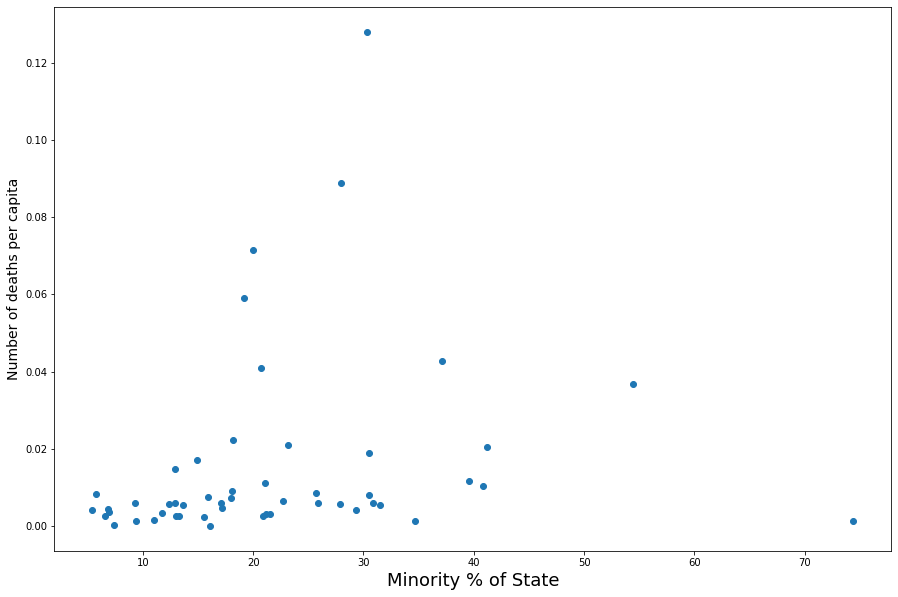

In [ ]:
race_final_df.to_sql('race_final', conn, if_exists = "replace") #convert to SQL
race_by_state_df = pd.read_sql(''' SELECT State, SUM(Total) AS Total, SUM(White) AS White, SUM(Black) AS Black, 
                                   SUM(Asian) AS Asian, SUM(Native_American) AS Native_American,
                                   SUM(Unclassified) AS Unclassified FROM race_final GROUP BY "State" ''', conn)
race_by_state_df['White%'] = (race_by_state_df['White']*100) / (race_by_state_df['Total'])
race_by_state_df['Minority%'] = 100 - race_by_state_df['White%']
# race_by_state_df

covid_deaths_final_df.to_sql('covid_deaths_by_state', conn, if_exists = "replace") #convert to SQL
covid_deaths_by_state_df = pd.read_sql(''' SELECT State_covid, SUM(total_deaths) AS total_deaths 
                                        FROM covid_deaths_by_state GROUP BY "State_covid" ''', conn)
covid_deaths_by_state_df

# race_by_state_df[race_by_state_df['State'] == "New York"]

combined_df = race_by_state_df.merge(covid_deaths_by_state_df, how='inner', left_on=["State"], right_on=["State_covid"])
combined_df['total_deaths%'] = (combined_df['total_deaths']*100) / combined_df['Total']
combined_df

plt.figure(figsize=(15,10))
plt.xlabel('Minority % of State', fontsize=18)
plt.ylabel('Number of deaths per capita', fontsize=14)
plt.scatter(combined_df['Minority%'], combined_df['total_deaths%'])
plt.show()

### 2.1.2: Minority % of State vs. Number of confirmed cases per capita

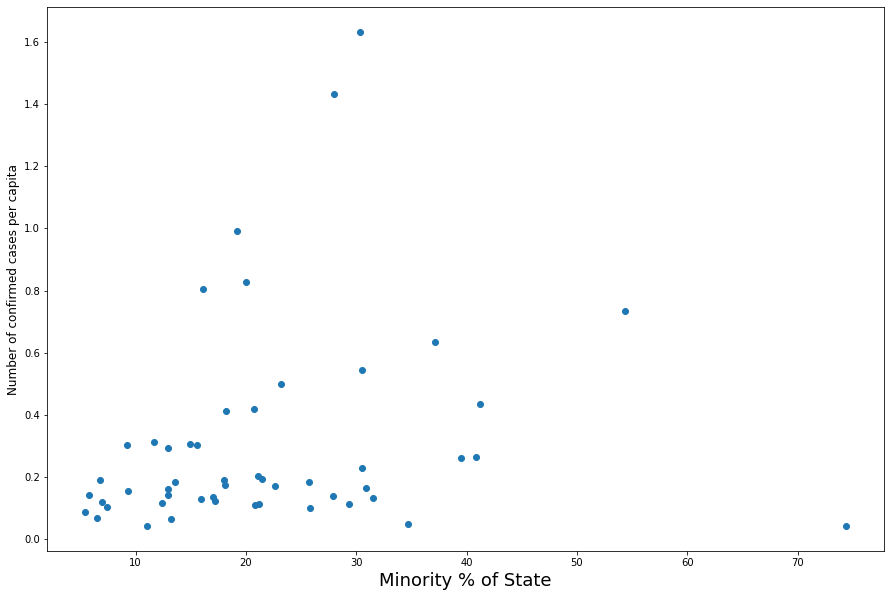

In [ ]:
covid_final_df.to_sql('covid_final_by_state', conn, if_exists = "replace") #convert to SQL
covid_final_by_state_df = pd.read_sql(''' SELECT State_covid, SUM(total_confirmed) AS total_confirmed 
                                        FROM covid_final_by_state GROUP BY "State_covid" ''', conn)

combined_df = combined_df.merge(covid_final_by_state_df, how='inner', left_on=["State"], right_on=["State_covid"])
combined_df['total_confirmed%'] = (combined_df['total_confirmed']*100) / combined_df['Total']

plt.figure(figsize=(15,10))
plt.xlabel('Minority % of State', fontsize=18)
plt.ylabel('Number of confirmed cases per capita', fontsize=12)
plt.scatter(combined_df['Minority%'], combined_df['total_confirmed%'])
plt.show()

### 2.1.3: Minority % of State vs. Percentage of Number of deaths/cases 

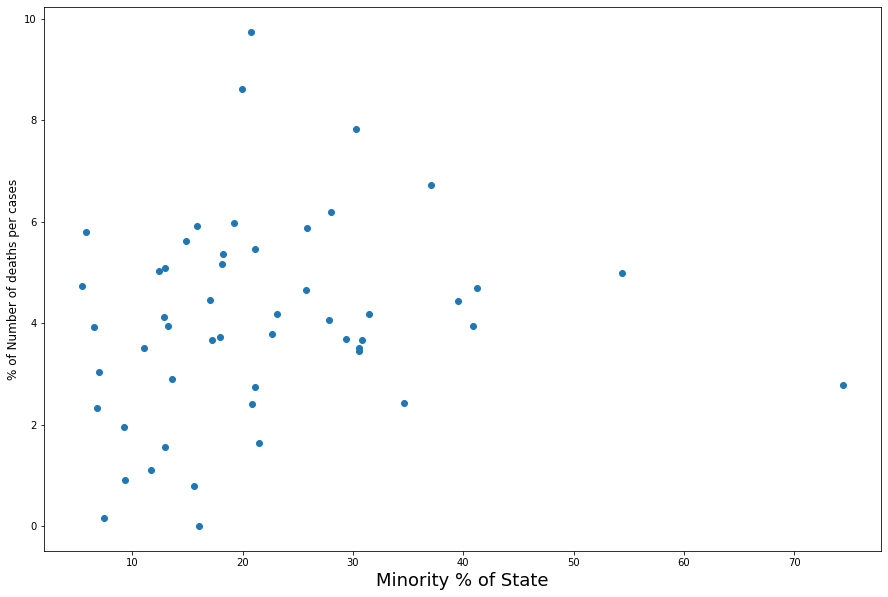

In [ ]:
combined_df['deaths_per_cases%'] = (combined_df['total_deaths']* 100) / combined_df['total_confirmed']

plt.figure(figsize=(15,10))
plt.xlabel('Minority % of State', fontsize=18)
plt.ylabel('% of Number of deaths per cases', fontsize=12)
plt.scatter(combined_df['Minority%'], combined_df['deaths_per_cases%'])
plt.show()

## 2.2: Poverty % of State vs. Percentage of Number of deaths/cases 

In [ ]:
master_df['Poverty_total'] = (master_df['Poverty_rate']/100) * master_df['Population']
master_df['Unemployment_total'] = (master_df['Unemployment_rate']/100) * master_df['Population']

master_df.to_sql('master2', conn, if_exists = "replace") #convert to SQL
master_df2 = pd.read_sql(''' SELECT State, SUM(Poverty_total) AS Poverty_total, SUM(Unemployment_total) AS Unemployment_total
                                        FROM master2 GROUP BY "State" ''', conn)

combined_df = combined_df.merge(master_df2, how='inner', left_on=["State"], right_on=["State"])

combined_df['Poverty_total%'] = (combined_df['Poverty_total']*100) / combined_df['Total']
combined_df['Unemployment_total%'] = (combined_df['Unemployment_total']*100) / combined_df['Total']

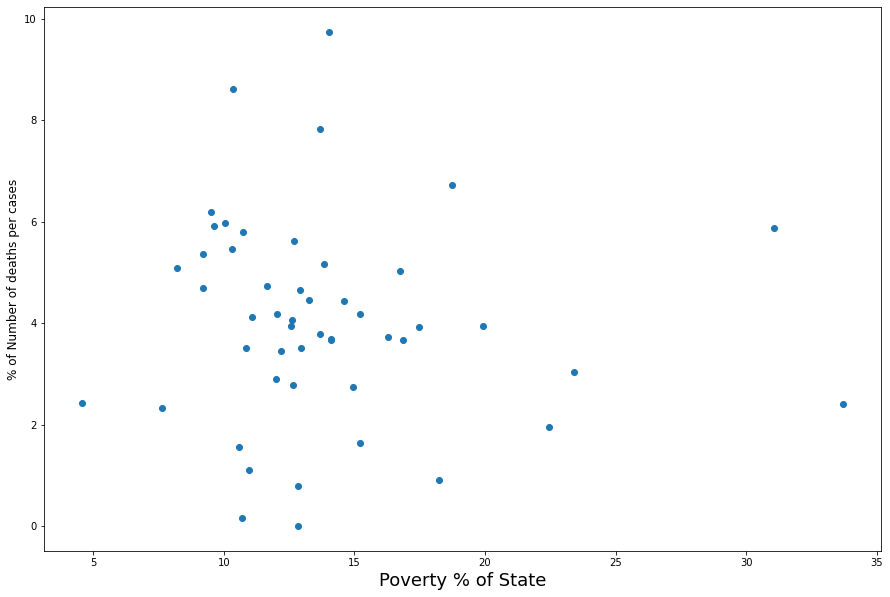

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Poverty % of State', fontsize=18)
plt.ylabel('% of Number of deaths per cases', fontsize=12)
plt.scatter(combined_df['Poverty_total%'], combined_df['deaths_per_cases%'])
plt.show()

## 2.3: Unemployment % of State vs. Percentage of Number of deaths/cases 

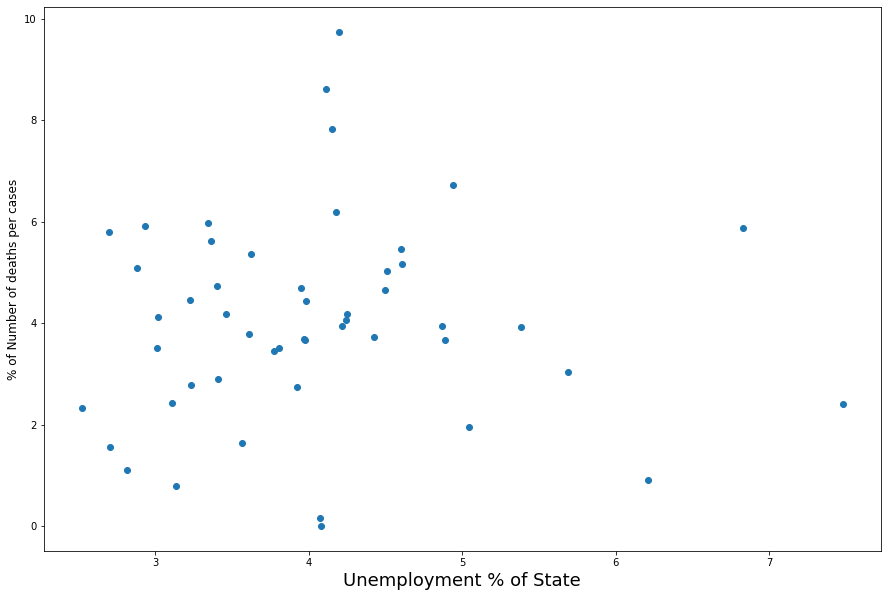

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Unemployment % of State', fontsize=18)
plt.ylabel('% of Number of deaths per cases', fontsize=12)
plt.scatter(combined_df['Unemployment_total%'], combined_df['deaths_per_cases%'])
plt.show()

## 2.4: Total number of confirmed cases in Philadelphia v/s Date

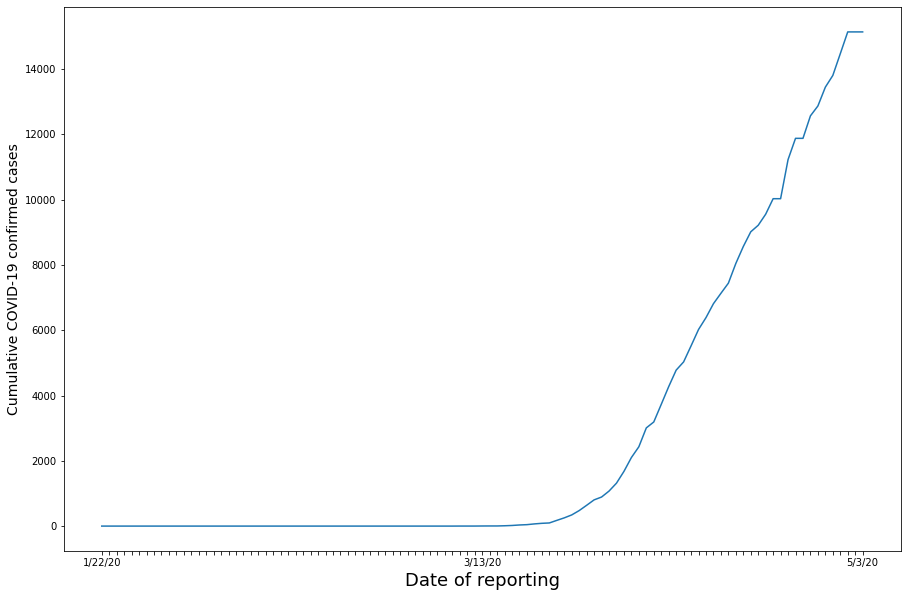

In [ ]:
covid_final_df.to_sql('covid_philly', conn, if_exists = "replace") #convert to SQL
covid_philly_df = pd.read_sql(''' SELECT * FROM covid_philly WHERE County_covid == "Philadelphia" ''', conn)

covid_list = covid_philly_df.values.tolist()[0]
for i in range (0, 3):
  covid_list.pop(0)
covid_list.pop(-1)

covid_dates = list(covid_philly_df.columns.values)
for i in range (0, 3):
  covid_dates.pop(0)
covid_dates.pop(-1)

for i in range (0, len(covid_dates)):
  if i != 0 and i != len(covid_dates)-1 and i != (len(covid_dates)-1)/2:
    covid_dates[i] = ""

plt.figure(figsize=(15,10))
plt.xlabel('Date of reporting', fontsize=18)
plt.ylabel('Cumulative COVID-19 confirmed cases', fontsize=14)
plt.xticks(range(len(covid_dates)), covid_dates)
plt.plot(covid_list)
plt.show()

## 2.5: Log of total number of confirmed cases in Philadelphia v/s Date

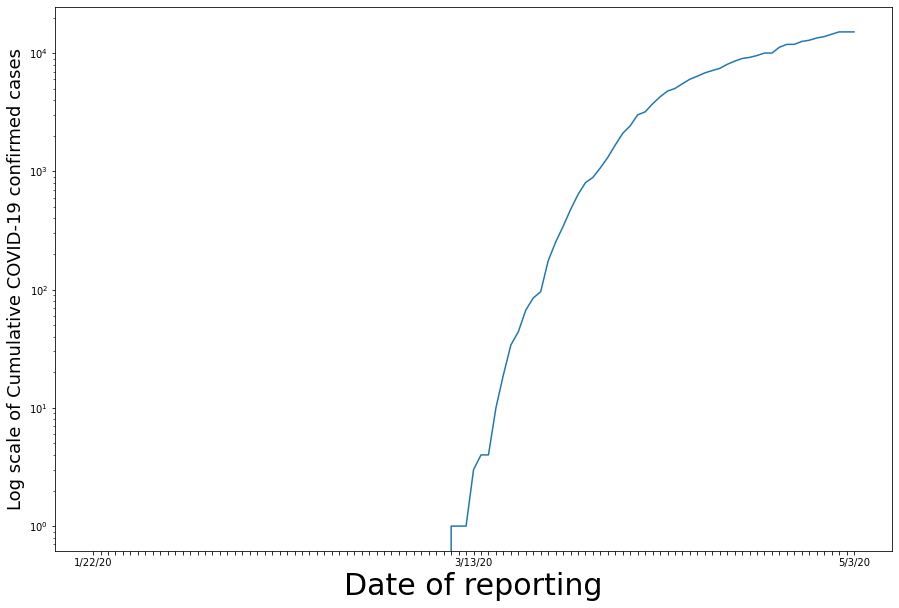

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Date of reporting', fontsize=30)
plt.ylabel('Log scale of Cumulative COVID-19 confirmed cases', fontsize=18)
plt.xticks(range(len(covid_dates)), covid_dates)
plt.plot(covid_list)
plt.yscale('log')
plt.show()

# Section 3: Modelling
## TBD

<p align = "center">
<img src = "
https://www.iberdrola.com/wcorp/gc/prod/en_US/comunicacion/machine_learning_mult_1_res/machine_learning_746x419.jpg" width= "720" align ="center"/>
</p>



In this section, we will attempt to predict if certain counties could be considered 'high risk' counties based on their poverty and unemployment rates. Since we do not know have a clear idea of what models would work best, we will try different classifier models.

## 3.1: Logistic Regression Model


### 3.1.1: Split into x and y

Split the data into features and label.

Features consist of the following attributes: 
*   Population
*   Poverty_rate
*   Unemployment_rate

And the label is High_Risk.

In [ ]:
def convertBoolToInt(x):
  if x == False: 
    return 0
  elif x == True:
    return 1

features = master_df[['Population', 'Poverty_rate','Unemployment_rate']]
label = master_df['High_Risk']
label = label.apply(convertBoolToInt)

### 3.1.2: Split into train and test

Use sklearn's train_test_split library and split data into train and test sets, we do an 80-20 split.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.20, 
	random_state=42)

### 3.1.3: Set up Logistic Regression Model

We can now train a Logistic Regression model using sklearn.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_regr_data = LogisticRegression()
log_regr_data.fit(x_train, y_train)
y_pred = log_regr_data.predict(x_test)
print(log_regr_data.score(x_test, y_test))

0.7756410256410257


As we can see, the Logistic Regression gives a fairly decent accuracy of ~77.5% when trained and tested on all 3 possible attributes - i.e. 'Population', 'Poverty_rate', 'Unemployment_rate'.

### 3.1.4: Varying the Logistic Regression Model 

Since we were unsure about how population would affect the model, we can try to exclude it from the training and testing sets.
We can then train a new Logistic Regression model on our updated training and testing sets.

In [ ]:
features = master_df[['Poverty_rate','Unemployment_rate']]
label = master_df['High_Risk']
label = label.apply(convertBoolToInt)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(features, label, test_size=0.20, 
	random_state=42)

log_regr_data_2 = LogisticRegression()
log_regr_data_2.fit(x_train_2, y_train_2)
y_pred_2 = log_regr_data_2.predict(x_test_2)
print(log_regr_data_2.score(x_test_2, y_test_2))

0.7772435897435898


By excluding Population from the training and testing data sets, we were able to get a marginal improvement in accuracy of ~78%.

## 3.2: Random Forest Model

Since we had already set up our training and testing sets for the Logistic Regression model in 3.1, this time we can proceed straight to setting up the Random Forest model. 

We will train and test on all 3 available attributes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_for_data = RandomForestClassifier(n_estimators=130, verbose=2, n_jobs=-1)
rand_for_data.fit(x_train, y_train)
y_pred = rand_for_data.predict(x_test)
print(rand_for_data.score(x_test, y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 130building tree 2 of 130

building tree 3 of 130building tree 4 of 130

building tree 5 of 130
building tree 6 of 130
building tree 7 of 130
building tree 8 of 130
building tree 9 of 130
building tree 10 of 130
building tree 11 of 130
building tree 12 of 130
building tree 13 of 130
building tree 14 of 130
building tree 15 of 130
building tree 16 of 130
building tree 17 of 130
building tree 18 of 130
building tree 19 of 130
building tree 20 of 130
building tree 21 of 130
building tree 22 of 130
building tree 23 of 130building tree 24 of 130

building tree 25 of 130
building tree 26 of 130
building tree 27 of 130
building tree 28 of 130
building tree 29 of 130
building tree 30 of 130
building tree 31 of 130
building tree 32 of 130
building tree 33 of 130
building tree 34 of 130
building tree 35 of 130
building tree 36 of 130
building tree 37 of 130
building tree 38 of 130
building tree 39 of 130
building tree 40 of 130
building tree 41 of 130
building tree 42 of 130
b

[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 130 out of 130 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 130 out of 130 | elapsed:    0.0s finished


0.7724358974358975


The Random Forest classifier also generates a similar prediction accuracy of ~77%. 

NOTE: I played around with the parameters a fair amount, until I finally settled on around about a value of 130 for "n_estimators", and that of 2 for "verbose".

## 3.3: Decision Tree Model

Again, we can directly proceed to setting up the Decision Tree model.

In [ ]:
from sklearn import tree

dec_tree_data = tree.DecisionTreeClassifier()
dec_tree_data.fit(x_train, y_train)
y_pred = dec_tree_data.predict(x_test)
print(dec_tree_data.score(x_test, y_test))

0.7163461538461539


The Decision Tree model gives us the worst accuracy yet, and that too, by a fair amount. Its reported accuracy is somewhere in the range of 70%-72%.  

# 4: Conclusion

In conclusion, I was able to find out a lot of new information that I was not previously exposed to (despite COVID-19 headlining my media and social feeds, as well as discussions with family and friends for well over two months now). I knew that exploring the topic in a more in-depth manner myself would lead to some discoveries, but I was definitely surprised by the results.

I was able to generate close to 80% accuracy by trying and testing different classifier models, which to me indicates that the poor and the unemployed have taken a far bigger hit from the COVID-19 crisis, and are likely to continue to relatively suffer much more in the coming months. 

I could definitely sense that coming with the way a lot of the visualizations turned out in Section 2. 